# EGRMGMT 590.10 Homework 3

*Due at 6:15pm ET on Thursday, February 21*

## Instructions

+ There are 16 exercises in total. Exercise 1 through 14 require coding. Your grades are based on the accuracy of the results, not the code execution speed.
  + Exercise 1 to 7, 10, 11, 13, 15 and 16: each is worth 0.5 points. 
  + Exercise 8, 9, 12 and 14: 1 point.
+ Exercise 8 and 9 require to create the curves **from scratch** without relying on scikit-learn, Scikit-plot, or any other modules with functions or capabilities to "plug-in and plot" those curves.
+ Exercises are dependent on prior exercises. Please work on them in the pre-determined order.
+ Submit the .ipynb file to Sakai before 6:15pm ET on Thursday, February 21.
+ Assignments handed in late will lose 1 point every 24-hour window after 6:15pm ET on Thursday, February 21.

## Dataset

**Dataset Information:**

We'll be working on a breast cancer dataset containing 569 samples of malignant and benign tumor cells. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

+ 1st column: ID number 
+ 2nd column: Diagnosis (M = malignant, B = benign) 
+ 3rd - 32th columns: 30 numerical features computed for each cell nucleus

**Dataset Source:**
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(Diagnostic)

## Exercises

**Exercise Overview**

+ We'll conduct classification analysis using the 30 numerical features to predict the likelihood that a given sample is malignant or benign. 

### Exercise 1 

+ Read the breast cancer dataset from its URL (https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data)
+ Keep the 30 numerical features in a NumPy array X
+ Use sklearn to encode the diagnosis labels (i.e. 'M' and 'B') to integers (i.e. 1 and 0) and keep the results in a NumPy array y

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pylab as plb
%matplotlib inline

In [2]:
br_df = pd.read_csv("breast-cancer-wisconsin-data_data.csv", header=None)

In [3]:
br_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,NaN
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,NaN
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,NaN
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,NaN


In [4]:
br_df.drop(br_df.index[0], inplace=True)

In [5]:
br_df.drop(columns=[32], inplace=True)

In [6]:
br_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
5,84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678


In [7]:
X = br_df.as_matrix(columns=br_df.columns[2:])

C:\Users\maddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [92]:
X

array([['17.99', '10.38', '122.8', ..., '0.2654', '0.4601', '0.1189'],
       ['20.57', '17.77', '132.9', ..., '0.186', '0.275', '0.08902'],
       ['19.69', '21.25', '130', ..., '0.243', '0.3613', '0.08758'],
       ...,
       ['16.6', '28.08', '108.3', ..., '0.1418', '0.2218', '0.0782'],
       ['20.6', '29.33', '140.1', ..., '0.265', '0.4087', '0.124'],
       ['7.76', '24.54', '47.92', ..., '0', '0.2871', '0.07039']],
      dtype=object)

In [9]:
from sklearn import preprocessing

In [10]:
l1 = preprocessing.LabelBinarizer()
l1.fit(br_df[1])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [11]:
y = l1.transform(br_df[1])

In [95]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

### Exercise 2

+ Use matplotlib to create a matrix of histograms for the 30 input features
+ Each subplot is for a unique feature and includes two histograms: one for the malignant tumors and the other for the benign tumors
+ Observe how the distributions vary between the malignant and benign tumors 

In [12]:
df=br_df.copy()

In [13]:
len(df.columns)

32

In [14]:
for i in range(2,len(df.columns)):
    df[i] = df[i].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 1 to 569
Data columns (total 32 columns):
0     569 non-null object
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), object(2)
me

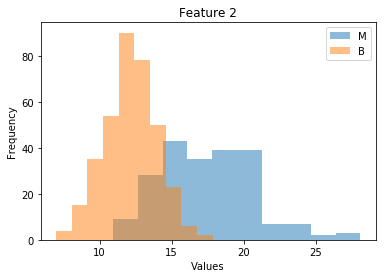

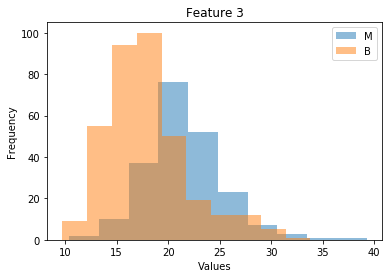

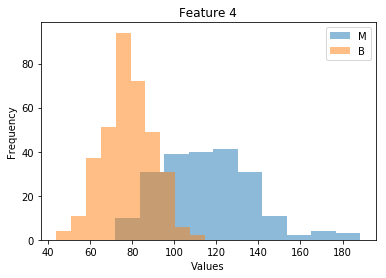

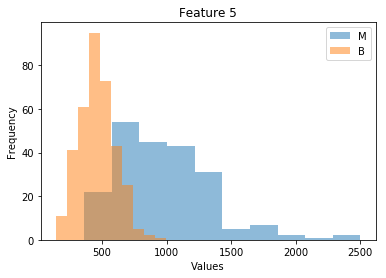

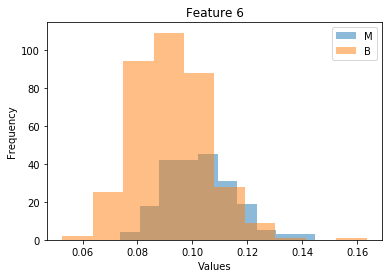

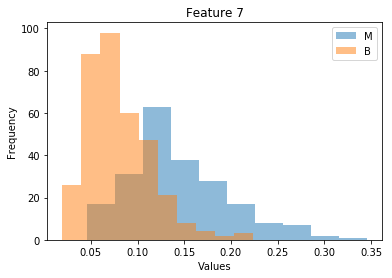

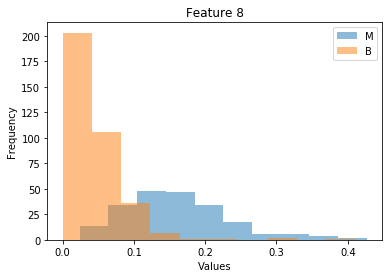

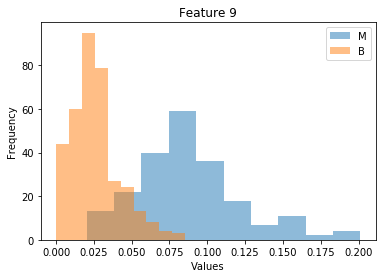

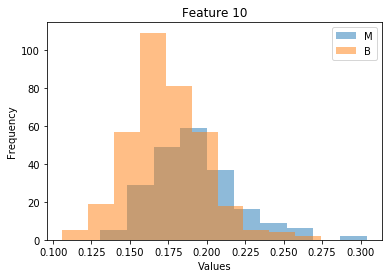

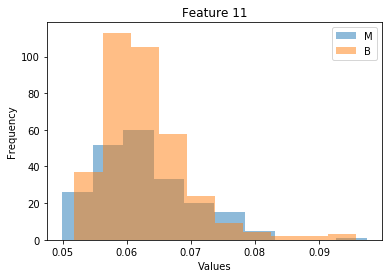

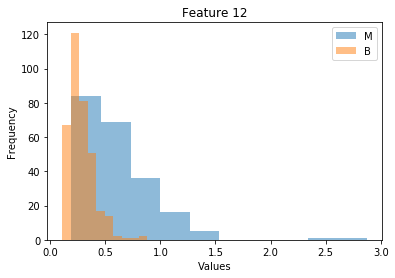

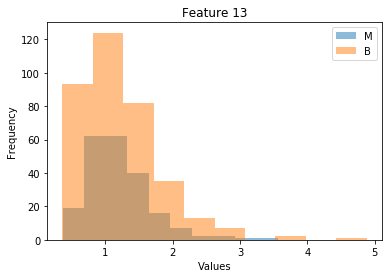

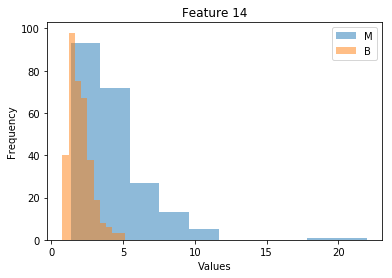

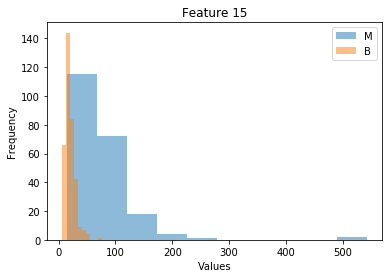

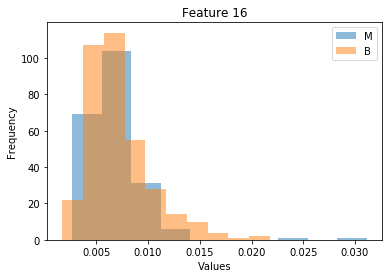

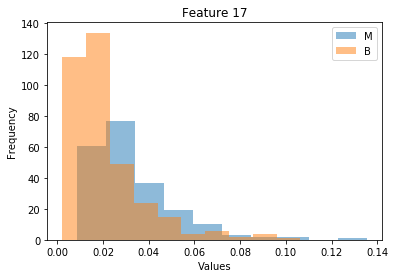

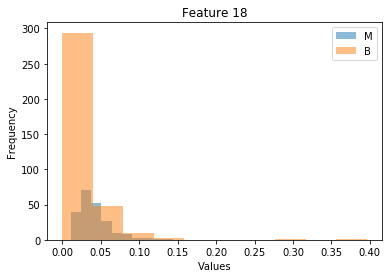

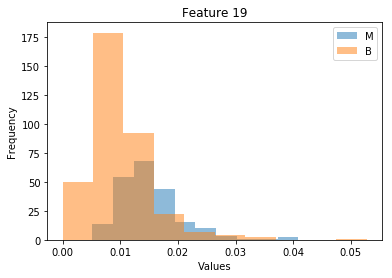

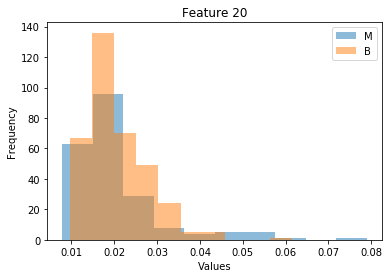

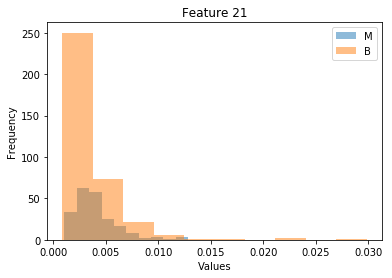

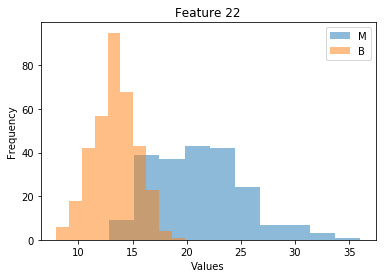

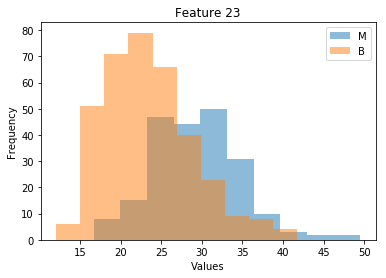

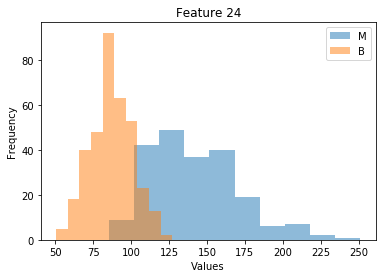

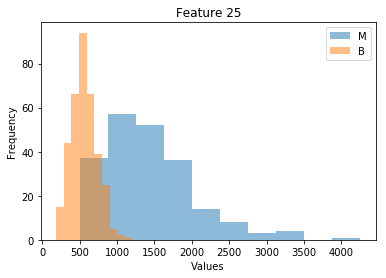

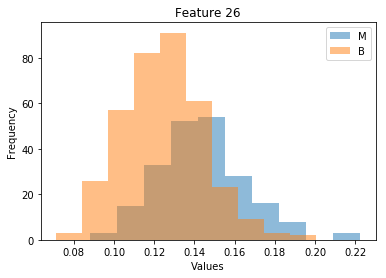

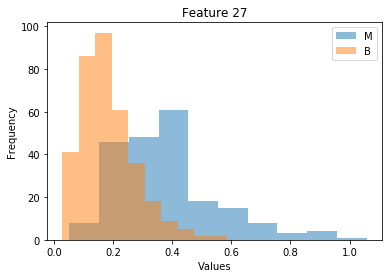

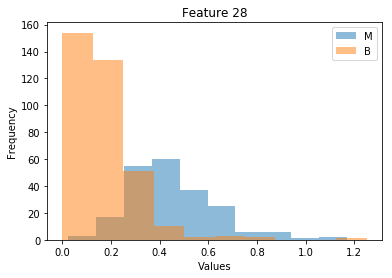

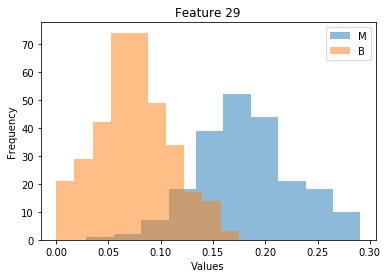

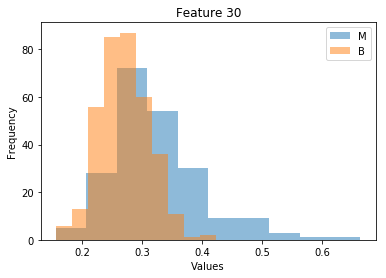

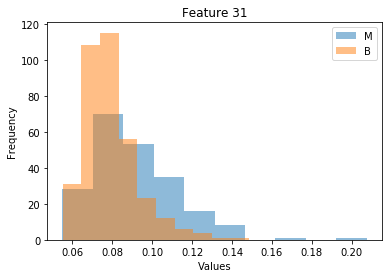

In [16]:
for i in range(2,len(df.columns)):
    plt.hist(df[df[1]=='M'][i], alpha=0.5, label = 'M')
    plt.hist(df[df[1]=='B'][i], alpha=0.5, label = 'B')
    plt.title('Feature %s'% i )
    plt.legend()
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

### Observations:
+ Not all features have a normal distribution
+ Many have skewed distributions
+ standardizing before using it in a machine learning model would increase the accuracy of the model

### Exercise 3

+ Use the stratified sampling approach to split the input features X and the output variable y into training and testing sets (i.e. X_train, y_train, X_test, and y_test) at a 8:2 ratio while preserving the proportions of malignant and benign tumors in each set
+ Compare the proportions of malignant and benign tumors among the overall, training, and testing sets

In [17]:
from sklearn.model_selection import train_test_split,StratifiedKFold

In [18]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [20]:
X_test.shape

(114, 30)

In [21]:
train_df = pd.DataFrame(data = y_train, columns=['y train'])
test_df = pd.DataFrame(data = y_test, columns=['y test'])

In [22]:
print('y_train class distribution')
print(train_df['y train'].value_counts(normalize=True))
print('y_test class distribution')
print(test_df['y test'].value_counts(normalize=True))

y_train class distribution
0    0.626374
1    0.373626
Name: y train, dtype: float64
y_test class distribution
0    0.631579
1    0.368421
Name: y test, dtype: float64


### Exercise 4

+ Use sklearn to create a Pipeline to process the data and build a classifier using the training dataset
+ The Pipeline includes three sequential steps:
  * Standardizing the 30 input features 
  * Using sklearn's PCA to reduce the 30 input features into 2 components
  * Fitting a logistic regression model using the 2 components as input variables
+ Apply the Pipeline to the training dataset and calculate its prediction accuracy rate

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [24]:
dat_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('pca_decom', PCA(n_components=2,random_state=42)),
        ('log_reg', LogisticRegression(random_state=42))
    ])

In [25]:
diag_train = dat_pipeline.fit(X_train,y_train)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
y_train_pred= dat_pipeline.predict(X_train)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
dat_pipeline.score(X_train,y_train)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9516483516483516

### Exercise 5

+ Create a precision and recall tradeoff chart using the training dataset and its predictions based on the Pipeline created in Exercise 4
+ Print the value of the optimal probability cut point for predicting the diagnosis outcomes

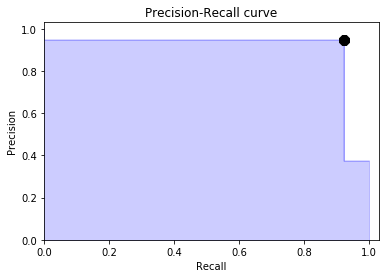

In [28]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_train, y_train_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.03])
plt.xlim([0.0, 1.03])
plt.title('Precision-Recall curve')
plt.plot(recall[1], precision[1], '8', c='k',markersize=10)

In [29]:
print("Optimal probability cut point for predicting the diagnosis:",recall[1],precision[1])

Optimal probability cut point for predicting the diagnosis: 0.9235294117647059 0.9457831325301205


### Exercise 6

+ Apply the Pipeline created in Exercise 4 and make predictions for the testing dataset
+ Calculate the following model quality metrics based on the testing dataset and its predictions
  * Confusion matrix
  * Precision score
  * Recall score
  * F1 score
  * ROC AUC score

In [30]:
diag_test = dat_pipeline.fit(X_test,y_test)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y_pred_test = dat_pipeline.predict(X_test)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
dat_pipeline.score(X_test,y_test)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9824561403508771

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print(pd.DataFrame(cnf_matrix,columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

     pred_neg  pred_pos
neg        71         1
pos         1        41


In [35]:
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Normalized confusion matrix")
print(pd.DataFrame(cnf_matrix,columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

Normalized confusion matrix
     pred_neg  pred_pos
neg  0.986111  0.013889
pos  0.023810  0.976190


In [36]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [37]:
f1_score(y_test, y_pred_test)  

0.9761904761904762

In [38]:
precision_score(y_test, y_pred_test)

0.9761904761904762

In [39]:
recall_score(y_test, y_pred_test)

0.9761904761904762

In [40]:
roc_auc_score(y_test, y_pred_test)

0.9811507936507938

### Exercise 7

+ Use sklearn to create two ROC curves on the same chart for the Pipeline created in Exercise 4:
  * One ROC curve is based on the training dataset and its predictions
  * The other ROC curve is based on the testing dataset and its predictions
+ Assess the chances of overfitting and underfitting by comparing the two ROC curves

In [41]:
from sklearn.metrics import roc_curve

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


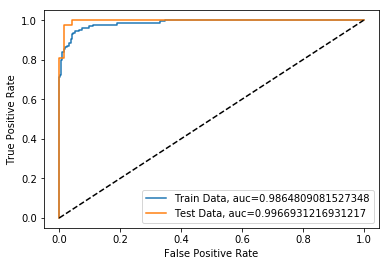

In [42]:
plt.figure(0).clf()

fpr, tpr, thresh = roc_curve(y_train, dat_pipeline.predict_proba(X_train)[:,1])
auc = roc_auc_score(y_train,dat_pipeline.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,label="Train Data, auc="+str(auc))

fpr, tpr, thresh = roc_curve(y_test,dat_pipeline.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, dat_pipeline.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label="Test Data, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], 'k--')
plt.legend()

### Assessing ROC Curve:
+ AUC of Test Data is greater than AUC of Training Data which implies that the model generalized well on the training dataset(i.e. it did not overfit or underfit), and predicted the test data set with great accuracy

### Exercise 8

+ Write a function plotROC(y, y_prob) to create a ROC curve from scratch:
    * y contains the actual outcomes
    * y_prob contains the predicted probabilities of the outcome occurring
+ Apply the plotROC function to the testing dataset and its prediction based on the Pipeline created in Exercise 4

In [43]:
y_pred_prob = dat_pipeline.predict_proba(X_test)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
y_pred_1 = y_pred_prob[:,1]

In [45]:
y_pred_0 = y_pred_prob[:,0]

In [47]:
df_c0 = pd.DataFrame(y_pred_0)

In [48]:
df_c0['Diagnosis'] = y_test

In [49]:
df_c0.sort_values(by=0, ascending=False, inplace=True)

In [50]:
df_c0

,0,Diagnosis
57,9.999986e-01,0
48,9.999853e-01,0
100,9.999533e-01,0
63,9.999503e-01,0
82,9.999317e-01,0
84,9.999176e-01,0
37,9.998980e-01,0
73,9.998736e-01,0
26,9.998473e-01,0
20,9.998151e-01,0


In [51]:
df_ci = pd.DataFrame(y_pred_prob)

In [52]:
df_ci['Diagnosis'] = y_test 

In [53]:
df_ci.drop(columns=[0],inplace=True)

In [54]:
df_ci.sort_values(by = 1, ascending=False, inplace=True)

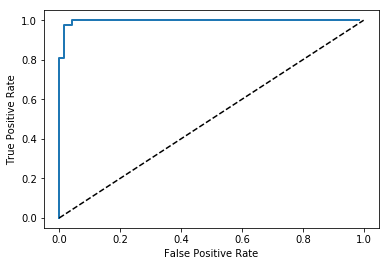

In [55]:
def plotROC(y,y_prob):
    tpr_n = []
    fpr_n = []
    thresh = list(y_prob).copy()
    for i in range(len(y_prob)):
        tp,fp,tn,fn = 0,0,0,0
        for j in range(len(y)):
            if y_prob[j] > thresh[i]:
                if y[j]==1:
                    tp+=1
                else:
                    fp+=1
            else:
                if y[j]==1:
                    fn+=1
                else:
                    tn+=1
        tpr_n.append(tp/(tp+fn))
        fpr_n.append(fp/(fp+tn))
    plt.plot(fpr_n,tpr_n, linewidth = 2, label = None)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plotROC(df_ci['Diagnosis'],df_ci[1])
plt.show()

### Exercise 9

+ Create a cumulative gains chart from scratch using the testing dataset and its predictions based on the Pipeline created in Exercise 4

Text(0.5,1,'Cumulative gain chart')

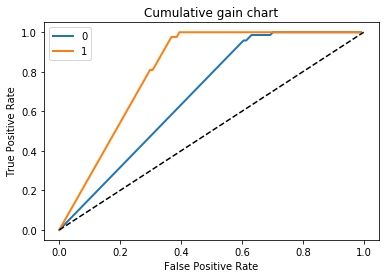

In [56]:
tpr_9 = []
sup_9 = []
tpr_9_0 = []
sup_9_0 = []
thresh = list(df_ci[1]).copy()
for i in range(len(df_ci)):
    tp,fp,tn,fn = 0,0,0,0
    for j in range(len(df_ci)):
        if df_ci[1][j] > thresh[i]:
            if df_ci['Diagnosis'][j]==1:
                tp+=1
            else:
                fp+=1
        else:
            if df_ci['Diagnosis'][j]==1:
                fn+=1
            else:
                tn+=1
    tpr_9.append(tp/(tp+fn))
    sup_9.append((tp+fp)/(len(df_ci[1])))
thresh = list(df_c0[0]).copy()
for i in range(len(df_c0)):
    tp,fp,tn,fn = 0,0,0,0
    for j in range(len(df_c0)):
        if df_c0[0][j] > thresh[i]:
            if df_c0['Diagnosis'][j]==0:
                tp+=1
            else:
                fp+=1
        else:
            if df_c0['Diagnosis'][j]==0:
                fn+=1
            else:
                tn+=1
    tpr_9_0.append(tp/(tp+fn))
    sup_9_0.append((tp+fp)/(len(df_c0[0])))
plt.plot(sup_9_0,tpr_9_0, linewidth = 2, label = '0')
plt.plot(sup_9,tpr_9, linewidth = 2, label = '1')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Cumulative gain chart')

### Exercise 10

+ Use sklearn to create a 10-fold stratified cross-validation for the training dataset while preserving the proportions of diagnosis in each fold
+ Re-fit the Pipeline specified in Exercise 4 via the 10-fold cross-validation on the training dataset, i.e. each iteration involves training the model on 9 folds and validating the model on the remaining 1 fold 
+ Print the accuracy rate of each of the validation fold

In [57]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [58]:
skf = StratifiedKFold(n_splits=10,random_state=42)
split_train=skf.split(X_train,y_train)

In [59]:
i=1
for train_index, test_index in split_train:
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    dat_pipeline.fit(X_train_cv,y_train_cv)
    y_pred_cv = dat_pipeline.predict(X_test_cv)
    print("Accuracy for fold %s =" %i ,dat_pipeline.score(X_test_cv , y_test_cv))
    i+=1

Accuracy for fold 1 = 0.9565217391304348
Accuracy for fold 2 = 0.9130434782608695
Accuracy for fold 3 = 0.9782608695652174
Accuracy for fold 4 = 1.0
Accuracy for fold 5 = 0.9347826086956522
Accuracy for fold 6 = 0.9111111111111111
Accuracy for fold 7 = 0.9111111111111111
Accuracy for fold 8 = 0.9777777777777777
Accuracy for fold 9 = 0.9111111111111111
Accuracy for fold 10 = 0.9555555555555556


C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning

### Exercise 11

+ Build a KNN classifier (*hint: sklearn's KNeighborsClassifier*) using the original 30 input features and find a set of top-performing hyperparameters (i.e. weights and number of neighbors) using a **grid search** with a 10-fold cross-validation on the training dataset
+ Identify the best combination of hyperparameters based on the F1 scores
+ Apply the best KNN classifier you identified to the testing dataset and calculate its F1 score based on its predictions

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [61]:
neigh = KNeighborsClassifier()

In [62]:
param_grid = {'n_neighbors': range(1,30), 'weights': ['uniform','distance']}

In [63]:
grid_search = GridSearchCV(neigh,param_grid, cv=10, scoring='f1')

In [64]:
grid_search.fit(X_train,y_train)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 30), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [65]:
cvres = grid_search.cv_results_

In [66]:
grid_search_res=[]
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    grid_search_res.append([np.sqrt(mean_score),params['n_neighbors'],params['weights'] ])
    print(np.sqrt(mean_score),params)

0.9492432053100873 {'n_neighbors': 1, 'weights': 'uniform'}
0.9492432053100873 {'n_neighbors': 1, 'weights': 'distance'}
0.937175811986575 {'n_neighbors': 2, 'weights': 'uniform'}
0.9492432053100873 {'n_neighbors': 2, 'weights': 'distance'}
0.9454800142043813 {'n_neighbors': 3, 'weights': 'uniform'}
0.9467760668515026 {'n_neighbors': 3, 'weights': 'distance'}
0.9430893645672527 {'n_neighbors': 4, 'weights': 'uniform'}
0.9455048752236208 {'n_neighbors': 4, 'weights': 'distance'}
0.9506341732993592 {'n_neighbors': 5, 'weights': 'uniform'}
0.9472677195008273 {'n_neighbors': 5, 'weights': 'distance'}
0.9427694718862766 {'n_neighbors': 6, 'weights': 'uniform'}
0.9469949931280529 {'n_neighbors': 6, 'weights': 'distance'}
0.9550024643882811 {'n_neighbors': 7, 'weights': 'uniform'}
0.9532633250598935 {'n_neighbors': 7, 'weights': 'distance'}
0.9456846062457358 {'n_neighbors': 8, 'weights': 'uniform'}
0.9534145656530185 {'n_neighbors': 8, 'weights': 'distance'}
0.9498594033652862 {'n_neighbors'

In [67]:
score_neigh=pd.DataFrame(grid_search_res , columns=['score','neighbor','weights'])

In [68]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [69]:
grid_search.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [70]:
neigh.n_neighbors = 7

In [71]:
neigh.weights='uniform'

In [72]:
neigh.fit(X_train,y_train)

C:\Users\maddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [73]:
y_test_gridcv=neigh.predict(X_test)

In [74]:
f1_score(y_test, y_test_gridcv, average='binary')

0.8684210526315789

### Exercise 12

+ Create a chart to visualize the grid search results of Exercise 11
+ Visualize how the average model quality metric of the validation folds varies across different combinations of hyperparameters 
+ Demonstrate the best hyperparameter combination identified in Exercise 11 indeed resulted in the highest model quality metric

In [75]:
score_neigh.sort_values(by='score', ascending=False).round(3).head()

,score,neighbor,weights
12,0.955,7,uniform
15,0.953,8,distance
13,0.953,7,distance
35,0.951,18,distance
8,0.951,5,uniform


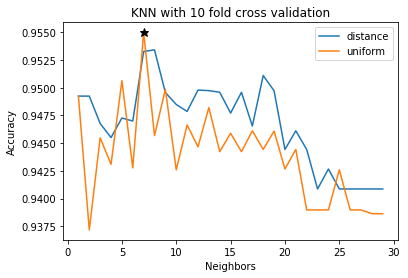

In [106]:
plt.plot(score_neigh[score_neigh['weights']=='distance']['neighbor'], score_neigh[score_neigh['weights']=='distance']['score'], label = 'distance')
plt.plot(score_neigh[score_neigh['weights']=='uniform']['neighbor'], score_neigh[score_neigh['weights']=='uniform']['score'], label = 'uniform')
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.plot( score_neigh[score_neigh['score']==max(score_neigh['score'])]['neighbor'],max(score_neigh['score']), '*', c='k',markersize=9)
plt.legend()
plt.title('KNN with 10 fold cross validation')
plt.show()

### Exercise 13

+ Build a KNN classifier (*hint: sklearn's KNeighborsClassifier*) using the original 30 input features and find a set of top-performing hyperparameters (i.e. weights and number of neighbors) using a **random search** with a 10-fold cross-validation on the training dataset
+ Identify the best combination of hyperparameters based on the F1 scores
+ Apply the best KNN classifier you identified to the testing dataset and calculate the F1 score based on its predictions

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
neigh_13 = KNeighborsClassifier()
param_grid_13 = {'n_neighbors': range(1,30), 'weights': ['uniform','distance']}
random_search = RandomizedSearchCV(neigh_13, param_grid_13, cv=10, scoring='f1')

In [79]:
random_search.fit(X_train,y_train)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_neighbors': range(1, 30), 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [80]:
cvres_13 = random_search.cv_results_ 

In [81]:
for mean_score_13, params_13 in zip(cvres_13['mean_test_score'],cvres_13['params']):
    print(np.sqrt(mean_score_13),params_13)

0.949736771952979 {'weights': 'distance', 'n_neighbors': 13}
0.9495632821456336 {'weights': 'distance', 'n_neighbors': 9}
0.9389764894927409 {'weights': 'uniform', 'n_neighbors': 26}
0.9492432053100873 {'weights': 'distance', 'n_neighbors': 2}
0.9389764894927409 {'weights': 'uniform', 'n_neighbors': 24}
0.9532633250598935 {'weights': 'distance', 'n_neighbors': 7}
0.945893779988797 {'weights': 'uniform', 'n_neighbors': 15}
0.9482077541687196 {'weights': 'uniform', 'n_neighbors': 13}
0.9550024643882811 {'weights': 'uniform', 'n_neighbors': 7}
0.9389764894927409 {'weights': 'uniform', 'n_neighbors': 23}


In [82]:
random_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [83]:
random_search.best_params_

{'weights': 'uniform', 'n_neighbors': 7}

In [84]:
neigh_13.n_neighbors = 8
neigh_13.weights = 'distance'
neigh_13.fit(X_train,y_train)
y_test_randcv=neigh_13.predict(X_test)
f1_score(y_test, y_test_randcv, average='binary')

C:\Users\maddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8684210526315789

### Exercise 14

+ Build a KNN classifier via a 10-fold cross-validation on the training dataset using the 30 original input features and the best hyperparameters identified in Exercise 13
+ Build a Random Forest classifier via a 10-fold cross validation on the training dataset using the 30 original input features and setting 50 as the number of trees in the forest
+ Create a pair of box plots to compare a model quality metric across the validation folds used to validate the KNN and Random Forest models

In [85]:
neigh_14 = KNeighborsClassifier(n_neighbors=7, weights='distance')

In [86]:
neigh_14.fit(X_train,y_train)

C:\Users\maddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

In [87]:
 from sklearn.ensemble import RandomForestClassifier

In [88]:
randf = RandomForestClassifier(n_estimators=50, random_state=42)

In [89]:
randf.fit(X_train, y_train)

C:\Users\maddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [90]:
scores_knn = cross_val_score(neigh_14,X_train, y_train, cv=10)
scores_randf = cross_val_score(randf,X_train, y_train, cv=10)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

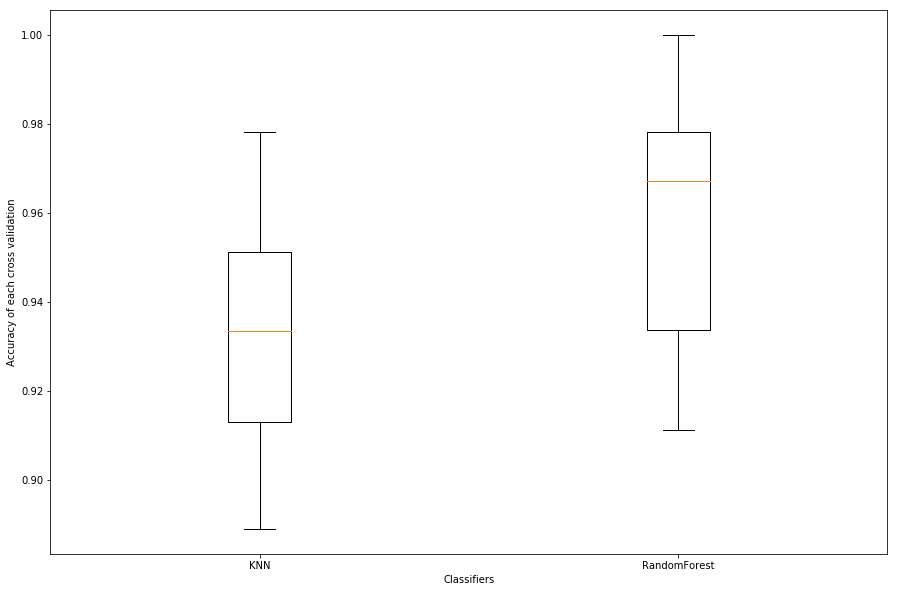

In [91]:
fig,ax = plt.subplots(figsize = (15,10))
ax.boxplot(x=[scores_knn,scores_randf])
ax.set_xticklabels(['KNN','RandomForest'])
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy of each cross validation')
plt.show()

### Exercise 15

+ Explain how the bias and variance would change when using a large vs. small k for the k-fold cross-validation

### Answer 15
+ If we choose a very small value of k for k-flod cross-validation, our model is highly biased. 
+ If we choose a very large value of k for k-flod cross-validation, we get a high variance.
+ We perform k-fold cross-validation to achieve low bias and low variance, but selecting the right value for k is key.
+ Practices suggest k between 5-10 is optimal for most of the cases to get low bias and low variance.

### Exercise 16

+ Explain the difference between probability, odds, and odds ratio

### Answer 16
+ Probability is defined as the fraction of desired outcomes in the context of every possible outcome with a value between 0 and 1, where 0 would be an impossible event and 1 would represent an inevitable event. 
+ Odds can have any value from zero to infinity and they represent a ratio of desired outcomes versus the field. Odds are a ratio, and can be given in two different ways: ‘odds in favor’ and ‘odds against’. ‘Odds in favor’ are odds describing the if an event will occur, while ‘odds against’ will describe if an event will not occur. 
+ Odds ratio is the ratio of two different odds, for example 'odds in favor' and 'odds against'.